# Logistic Regression
Logistic regression is the appropriate regression analysis to conduct when the dependent variable is binary. The logistic regression is a predictive analysis. Logistic regression is used to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables. 

A logistic regression produces a logistic curve which is limited to between 0 and 1. For example, to predict whether an email is spam (1) or (0). Logistic regression is kind of the same as a linear regression, but the curve is constructed using the natural logarithm of odds of the target variable instead of probability. 
<img src="logistic regression.png" width="800" height="400">

## Several funtions were build as following:
* Sigmoid function 

$sig(t)=\frac{1}{1+e^{-t}}$

<img src="https://miro.medium.com/max/1400/1*RqXFpiNGwdiKBWyLJc_E7g.png" width="600" height="400">

If Z goes to infinity, predicted value will become 1 and if Z goes to negative infinity, predicted valure will become 0.

* Log loss function

In logistic regression, it will be a non-convex function of parameters (theta).
 
* Decision Boundary

In order to predict the class, a threshold can be set. The obtained estimated probability is classified into classes based on threshold. If the predicted value larger than 0.5, then email is in spam class. Otherwise, it in nonspam class. 
Decision boundary can be linear or non-linear. 



After that，gradient descent algorithm to find weights, and bias. Finally, we will measure accuracy and plot the decision boundary. 


The following packages will be used in this project:
*   matplotlib.pyplot: [Link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)
*   numpy: [Link](https://numpy.org/devdocs/)
*   pandas: [Link](https://pandas.pydata.org/docs/)
*   sklearn: [Link](https://scikit-learn.org/stable/)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
%matplotlib inline 

## About the dataset 
This dataset is about the health care-heart attack poosibility. [Link](https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility)


The "target" variable refers to the presence of heart disease. It is integer valued 0 means no/less chance of heart attack and 1 means more chance of heart attack

In [45]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Plot the scatter graphs. The feild "thalach" means the maximum heart rate achieved, and feild "trestbps" means the resting blood pressure. Use this two variables as X and target as y. 

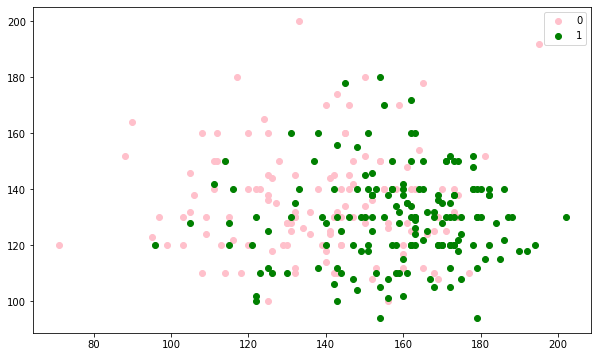

In [121]:
X = df[["thalach", "trestbps"]].to_numpy()
y = df["target"].to_numpy()
plt.figure(figsize=(10,6))

plt.scatter(X[y==0][:,0],X[y==0][:,1],color="pink",label="0")
plt.scatter(X[y==1][:,0],X[y==1][:,1],color="green",label="1")
plt.legend()

Next, I separated the data into training data and testing data. 

In [122]:
X_train,X_test,y_train,y_test=train_test_split(X,
                                              y,
                                              test_size=0.2,
                                              random_state=42)


I use the training data to plot the scatter graphs as following. Pink as 0; green as 1.

Text(0.5, 1.0, 'Plot of training dataset')

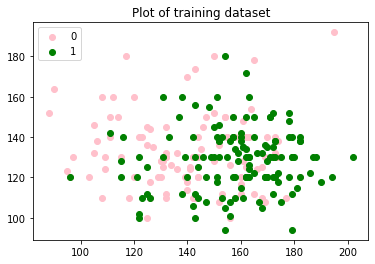

In [125]:
plt.scatter(X_train[y_train==0][:,0],X_train[y_train==0][:,1],color="pink",label="0")
plt.scatter(X_train[y_train==1][:,0],X_train[y_train==1][:,1],color="green",label="1")
plt.legend()
plt.title("Plot of training dataset")


Text(0, 0.5, 'Less or more chance of heart attack')

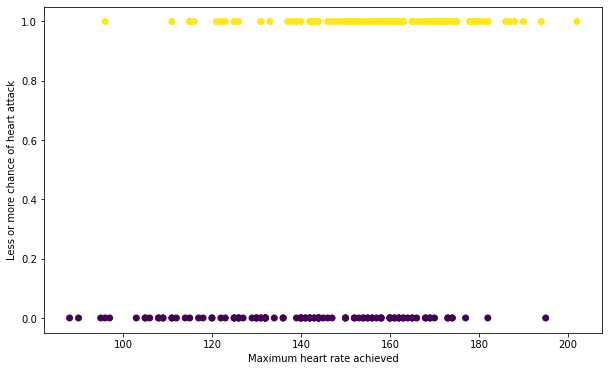

In [129]:
plt.figure(figsize=(10, 6))
plt.scatter(X_trian[:, 0], y_train, c = y_train)
plt.xlabel("Maximum heart rate achieved")
plt.ylabel("Less or more chance of heart attack")

## Sigmoid function
The sigmoid fuction squishes all its inputs between 0 and 1. 

$g(z) = \frac{1}{1+e^{-z}}$

We observed that as Z increases towards positive infinity the output gets closer to 1, and as Z decreases towards negative infinity the output gets closer to 0. 



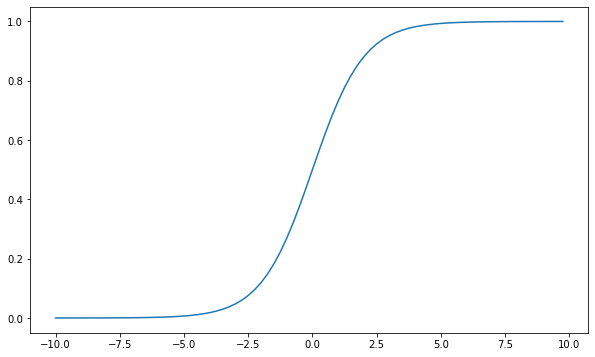

In [75]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))
domain = np.arange(-10, 10, .25)
plt.figure(figsize=(10, 6))
plt.plot(domain, sigmoid(domain))

## Functions

Build up several functions:
* Nomalize: function to nomalize the inputs
* Loss: log loss function 
* Gradient: use gradient descent algorithm to find the optimal values of weights, and biases . 
* Train: it includes initializing the weights and bias and the training loop with mini-batch gradient descent. 
* plot_decision_boundary: z = 0 is decision boundary

In [117]:
def normalize(X):
    # X --> Input.
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    # Normalizing all the n features of X.
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)
    return X
def loss(y, y_hat):
    return -y*np.log(y_hat) - (1.0-y)*np.log(1.0-y_hat)

def gradient(X, y,y_hat):
    m=X.shape[0]
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    db = (1/m)*np.sum((y_hat - y)) 
    return dw, db 
def train(X, y, bs, epochs, lr):    
    m, n = X.shape   
    w = np.zeros((n,1))
    b = 0
    y = y.reshape(m,1)
    x = normalize(X)
    losses = []
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            y_hat = sigmoid(np.dot(xb, w) + b)
            dw, db = gradient(xb, yb, y_hat)
            w -= lr*dw
            b -= lr*db
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
    return w, b, losses
def plot_decision_boundary(X, w, b):
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 + c
    fig = plt.figure(figsize=(10,8))
    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], color='pink')
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], color='green')
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')

### Decision Boundary plot for training data. 

<ipython-input-117-c5c33b1e0c25>:11: RuntimeWarning: divide by zero encountered in log
  return -y*np.log(y_hat) - (1.0-y)*np.log(1.0-y_hat)
<ipython-input-117-c5c33b1e0c25>:11: RuntimeWarning: invalid value encountered in multiply
  return -y*np.log(y_hat) - (1.0-y)*np.log(1.0-y_hat)


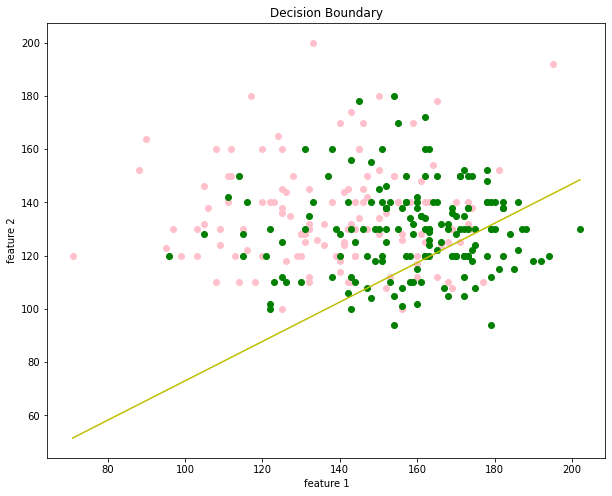

In [118]:
#Training
w,b,l=train(X_train,y_train,bs=100,epochs=10000,lr=0.01)
plot_decision_boundary(X, w, b)

### Decision Boundary plot for testing data

<ipython-input-117-c5c33b1e0c25>:11: RuntimeWarning: divide by zero encountered in log
  return -y*np.log(y_hat) - (1.0-y)*np.log(1.0-y_hat)
<ipython-input-117-c5c33b1e0c25>:11: RuntimeWarning: invalid value encountered in multiply
  return -y*np.log(y_hat) - (1.0-y)*np.log(1.0-y_hat)


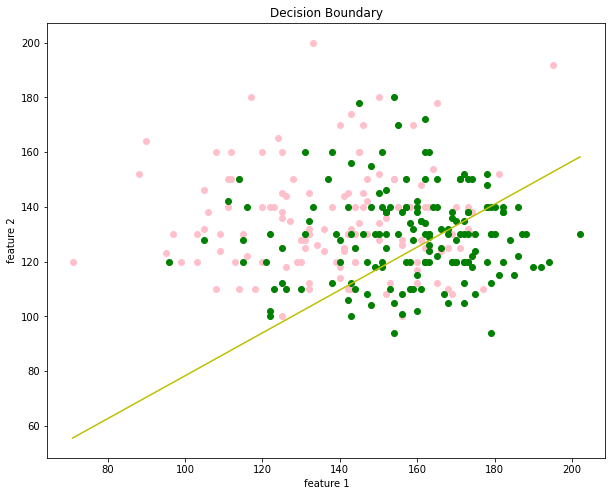

In [130]:
w,b,l=train(X_test,y_test,bs=100,epochs=10000,lr=0.01)
plot_decision_boundary(X, w, b)

# Finally, make prediction
Build up a predict function and use predict value to calculate the accuracy. 
Finally, we get the accuracy value with 61% accuracy. 

In [131]:
def predict(X):
    x = normalize(X)
    preds = sigmoid(np.dot(X, w) + b)
    pred_class = []
    pred_class = [1 if i > 0.5 else 0 for i in preds]    
    return np.array(pred_class)
def accuracy(y, y_hat):
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy

In [132]:
accuracy(y,predict(X))

0.6138613861386139

In addition, print out the precision, recall, f1-score and support value. Not bad overall. 

In [152]:
pp=predict(X_train)
print(classification_report(y_train,pp))

              precision    recall  f1-score   support

           0       0.53      0.80      0.64       109
           1       0.72      0.43      0.54       133

    accuracy                           0.60       242
   macro avg       0.63      0.61      0.59       242
weighted avg       0.64      0.60      0.58       242

